In [1]:
from vega_datasets import data
data.sf_temps()
import pandas as pd
import matplotlib.pyplot as plt

1.Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
df = data.sf_temps()

In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df['day'] = df.date.dt.day_name()

In [5]:
df['hour'] = df.date.dt.hour

In [6]:
df.head()

,temp,date,day,hour
0,47.8,2010-01-01 00:00:00,Friday,0
1,47.4,2010-01-01 01:00:00,Friday,1
2,46.9,2010-01-01 02:00:00,Friday,2
3,46.5,2010-01-01 03:00:00,Friday,3
4,46.0,2010-01-01 04:00:00,Friday,4


In [7]:
df = df.set_index('date').sort_index()
df

,temp,day,hour
date,,,
2010-01-01 00:00:00,47.8,Friday,0
2010-01-01 01:00:00,47.4,Friday,1
2010-01-01 02:00:00,46.9,Friday,2
2010-01-01 03:00:00,46.5,Friday,3
2010-01-01 04:00:00,46.0,Friday,4
...,...,...,...
2010-12-31 19:00:00,50.4,Friday,19
2010-12-31 20:00:00,49.9,Friday,20
2010-12-31 21:00:00,49.4,Friday,21


In [8]:
df.head(30)

,temp,day,hour
date,,,
2010-01-01 00:00:00,47.8,Friday,0
2010-01-01 01:00:00,47.4,Friday,1
2010-01-01 02:00:00,46.9,Friday,2
2010-01-01 03:00:00,46.5,Friday,3
2010-01-01 04:00:00,46.0,Friday,4
2010-01-01 05:00:00,45.8,Friday,5
2010-01-01 06:00:00,45.9,Friday,6
2010-01-01 07:00:00,45.9,Friday,7
2010-01-01 08:00:00,46.4,Friday,8


In [9]:
df.resample('d').mean()

,temp,hour
date,,
2010-01-01,49.170833,11.5
2010-01-02,49.304167,11.5
2010-01-03,49.391667,11.5
2010-01-04,49.445833,11.5
2010-01-05,49.491667,11.5
...,...,...
2010-12-27,48.991667,11.5
2010-12-28,49.000000,11.5
2010-12-29,49.012500,11.5


<AxesSubplot:xlabel='date'>

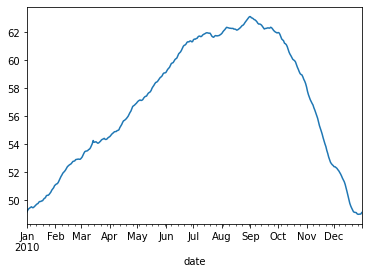

In [10]:
df.temp.resample('d').mean().plot()

2.Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

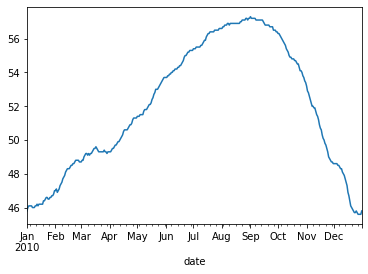

In [11]:
df.temp.resample('d').min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

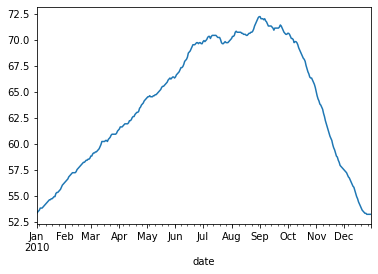

In [12]:
df.temp.resample('d').max().plot()

4. Which month is the coldest, on average?

In [13]:
df.temp.resample('M').mean()

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

In [14]:
min_of_each_month=df.resample('M').temp.mean()

In [15]:
min_of_each_month

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

In [16]:
min_of_each_month.idxmin().month_name()

'January'

5. Which month has the highest average temperature?

In [17]:
avg_temp_by_month = df.temp.resample('M').mean()

In [18]:
avg_temp_by_month.idxmax().month_name()

'September'

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temp for the day. Which month has the highest daily temp variability?

In [19]:
min_max_per_day = df.temp.resample('D').agg(['min', 'max'])

In [20]:
min_max_per_day['variability'] = min_max_per_day['max']-min_max_per_day['min']

In [21]:
min_max_per_day

,min,max,variability
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [22]:
min_max_per_day.variability.idxmax().month_name()

'August'

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [23]:
daily_min = df.temp.resample('D').min()
daily_avg = df.temp.resample('D').mean()
daily_max = df.temp.resample('D').max()

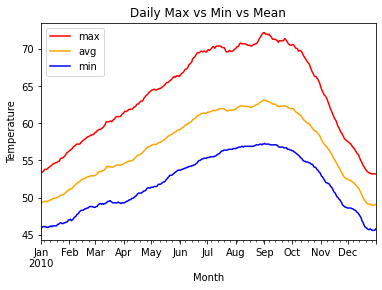

In [24]:
daily_max.plot(color='red')
daily_avg.plot(color='orange')
daily_min.plot(color='blue')
plt.legend(['max', 'avg', 'min'])
plt.title("Daily Max vs Min vs Mean")
plt.ylabel("Temperature")
plt.xlabel("Month")
plt.show()

# Seattle Weather Dataset

In [25]:
sw = data.seattle_weather()

In [26]:
sw

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Which year and month combination has the highest amount of precipitation?

In [27]:
sw = sw.set_index('date').sort_index()
sw

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [28]:
sw.precipitation.idxmax()
print(f"Month: {sw.precipitation.idxmax().month_name()} Year: {sw.precipitation.idxmax().year}" )

Month: March Year: 2015


Visualize the amount of monthly precipitation over time.

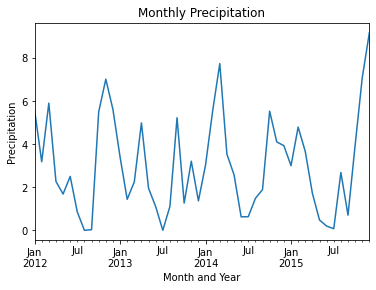

In [29]:
sw.precipitation.resample("M").mean().plot()
plt.ylabel("Precipitation")
plt.xlabel("Month and Year")
plt.title("Monthly Precipitation")
plt.show()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

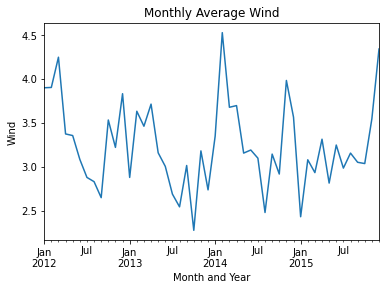

In [30]:
sw.wind.resample("M").mean().plot()
plt.ylabel("Wind")
plt.xlabel("Month and Year")
plt.title("Monthly Average Wind")
plt.show()

Which year-month combination is the windiest?

In [31]:
print(f"Month: {sw.wind.idxmax().month_name()} Year: {sw.wind.idxmax().year}" )

Month: December Year: 2012


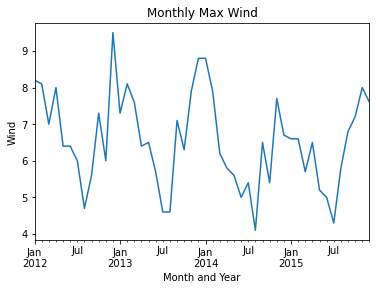

In [32]:
sw.wind.resample("M").max().plot()
plt.ylabel("Wind")
plt.xlabel("Month and Year")
plt.title("Monthly Max Wind")
plt.show()

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [33]:
sw[sw.weather == 'sun'].resample('Y').count().idxmax()

precipitation   2014-12-31
temp_max        2014-12-31
temp_min        2014-12-31
wind            2014-12-31
weather         2014-12-31
dtype: datetime64[ns]

In [34]:
(sw.weather == 'sun').resample("Y").sum().idxmax().year

2014

In which month does it rain the most?

<AxesSubplot:xlabel='date'>

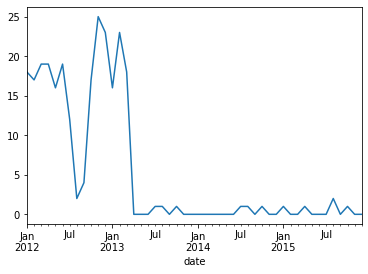

In [35]:
(sw.weather == 'rain').resample("M").sum().plot()

In [36]:
rainy_by_month = (sw.weather == 'rain').resample("M").sum()

In [37]:
pd.to_datetime(rainy_by_month.index)

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', freq='M')

In [38]:
rainy_by_month.index.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'January', 'February',
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December'],
      dtype='object', name='date')

In [39]:
rainy = pd.DataFrame(rainy_by_month)

In [40]:
rainy['month'] = rainy_by_month.index.month_name()

In [52]:
rainy.groupby('month').max()

,weather
month,
April,19
August,2
December,23
February,23
January,18
July,12
June,19
March,19
May,16
